In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('amarelo_azul.csv')

In [ ]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())


In [4]:
# Converter rótulos de cores em valores numéricos
df['label'] = df['Cor'].map({'Amarelo': 1, 'Azul': 0})


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [10]:
# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 16)  # Input layer (2 features) to hidden layer (16 neurons)
        self.fc2 = nn.Linear(16, 16)  # Hidden layer (16 neurons) to hidden layer (16 neurons)
        self.fc3 = nn.Linear(16, 1)   # Hidden layer (16 neurons) to output layer (1 neuron)

    def forward(self, x):
        x = torch.relu(self.fc1(x))    # Apply ReLU activation to the first hidden layer
        x = torch.relu(self.fc2(x))    # Apply ReLU activation to the second hidden layer
        x = torch.sigmoid(self.fc3(x))  # Apply sigmoid activation to the output layer
        return x

model = Net()


In [11]:
# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer


In [126]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze()  # Ensure correct shape

        # Convert labels to float (for BCELoss)
        labels = labels.float()  

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Print training progress (optional)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print(f'Finished Training')


Epoch [10/100], Loss: 0.0000
Epoch [20/100], Loss: 0.0013
Epoch [30/100], Loss: 0.0011
Epoch [40/100], Loss: 0.0024
Epoch [50/100], Loss: 0.0004
Epoch [60/100], Loss: 0.0024
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0005
Epoch [90/100], Loss: 0.0011
Epoch [100/100], Loss: 0.0009
Finished Training


In [129]:
# Evaluation on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No need to calculate gradients during evaluation
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        outputs = outputs.squeeze()
        predicted = torch.round(outputs)  # Round predictions to 0 or 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy of the model on the {total} test images: {accuracy:.2f} %')


Test Accuracy of the model on the 4 test images: 75.00 %


In [66]:
# Create meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))



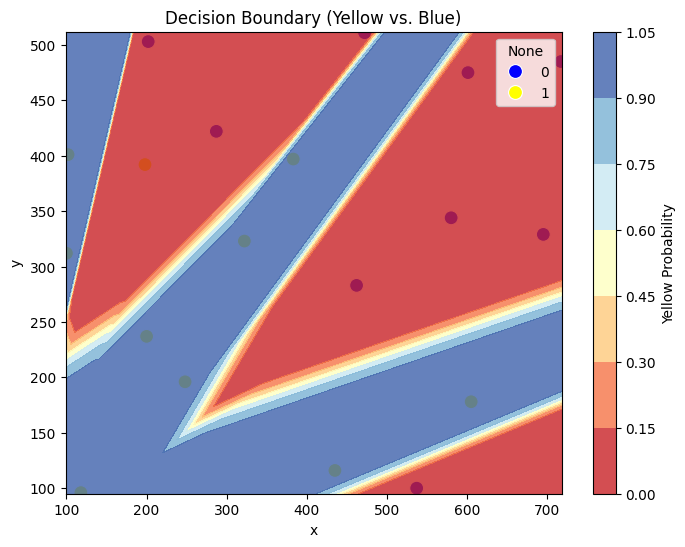

In [125]:
# Reshape Z to match the meshgrid shape
Z = Z.reshape(xx.shape)

# Plot original data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=['blue', 'yellow'], s=100)

# Plot decision boundary (contour plot)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)  
plt.colorbar(label='Yellow Probability')

plt.title('Decision Boundary (Yellow vs. Blue)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
